In [1]:
import numpy as np
import cv2 as cv
import  matplotlib.pyplot as plt
import re

In [2]:
img1 = cv.imread('data/FurukawaPonce/MorpheusL.jpg') #queryimage # left image
img2 = cv.imread('data/FurukawaPonce/MorpheusR.jpg') #trainimage # right image


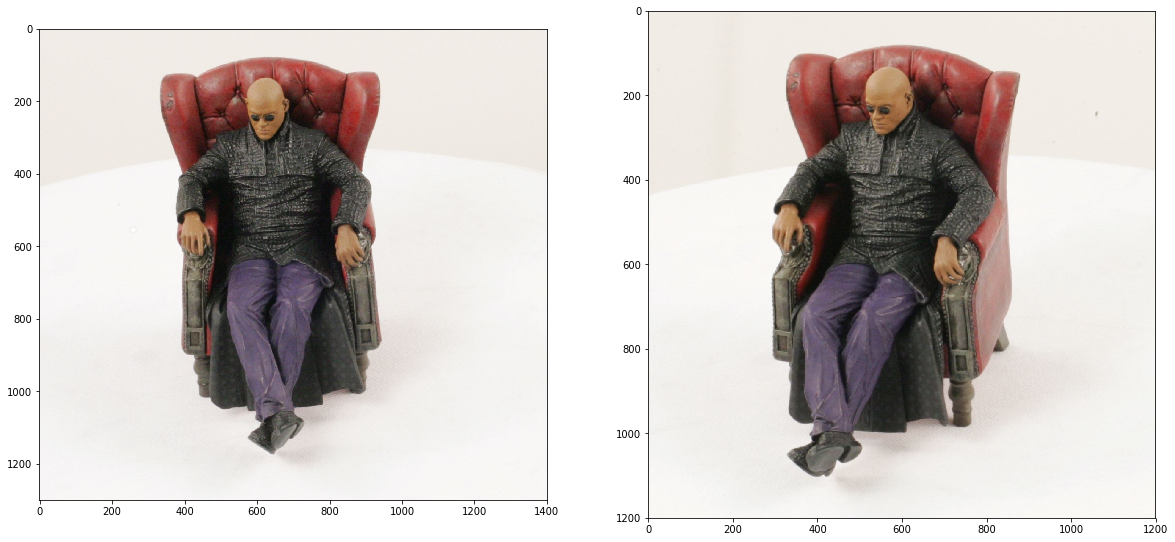

In [3]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.subplot(121),plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.show()

## fix images size

In [4]:
img1.shape, img2.shape

((1300, 1400, 3), (1200, 1200, 3))

In [5]:
#img2 = cv.copyMakeBorder(img2,0,100,200,0,cv.BORDER_CONSTANT)
dim = (1400, 1300)
img2 = cv.resize(img2, dim, interpolation = cv.INTER_AREA)

img1.shape, img2.shape

((1300, 1400, 3), (1300, 1400, 3))

/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


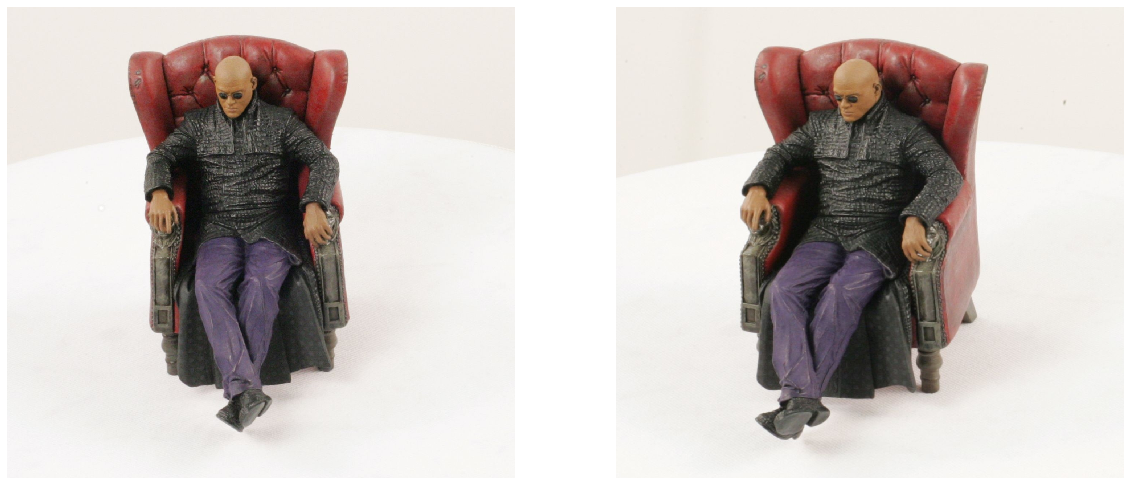

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.subplot(121),plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))


plt.subplot(121).get_xaxis().set_visible(False)
plt.subplot(121).get_yaxis().set_visible(False)
plt.subplot(122).get_xaxis().set_visible(False)
plt.subplot(122).get_yaxis().set_visible(False)

plt.subplot(121).axis('off')
plt.subplot(122).axis('off')

plt.show()

## load cams parameters

In [7]:
# def load_calib_dict(file_path):
#     """ """
#     d = {}
#     data = ''
#     with open(file_path) as f:
#         data = f.readlines()
#         for idx in range(len(data)):
#             data[idx] = data[idx].replace("\n","")
            
#         d['fc'] = eval(data[1].split('=')[1].replace(";",","))
#         d['cc'] = eval(data[4].split('=')[1].replace(";",","))
#         d['alpha_c'] = float(data[6].split('=')[1].replace(";",""))
        
#         r0 = eval(data[11].split("=")[1].replace(";","]"))
#         r1 = eval(data[12].replace("      ","[").replace(";","]"))
#         r2 = eval(data[13].replace("     ","["))
#         d['R'] = np.array([r0, r1, r2])
        
#         d['Tc'] = eval(data[15].split("=")[1].replace(";",','))
#     return d

# calib_dict_left = load_calib_dict("data/FurukawaPonce/MorpheusL.txt")
# calib_dict_right = load_calib_dict("data/FurukawaPonce/MorpheusR.txt")

# calib_dict_left

## Computes fundamental matrix

In [8]:
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)


# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        
len(pts1),len(pts2)

(298, 298)

In [9]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

In [10]:

F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)

F

array([[-2.89827273e-08, -6.10313690e-07, -1.19049199e-03],
       [ 1.85641722e-07, -1.58865387e-07,  1.70342309e-02],
       [-4.30383905e-04, -1.71389106e-02,  1.00000000e+00]])

In [11]:
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]
len(pts1),len(pts2)

(209, 209)

## Computes essential matrix

In [12]:
# ## Builds K matrix 

# K_left = [[calib_dict_left['fc'][0],0,calib_dict_left['cc'][0]],
#          [0, calib_dict_left['fc'][1], calib_dict_left['cc'][1]],
#          [0, 0, 1]]
# K_left = np.array(K_left)

# K_right = [[calib_dict_right['fc'][0],0,calib_dict_right['cc'][0]],
#          [0, calib_dict_right['fc'][1], calib_dict_right['cc'][1]],
#          [0, 0, 1]]
# K_right = np.array(K_right)

In [13]:
# E = K_right.T * F * K_left
# E

## Recovers Pose relative to the cameras

In [14]:
# retval, R, t, mask = cv.recoverPose(E,pts1,pts2)
# print(retval)

In [15]:
# R

In [16]:
# t

In [17]:
## Usa stereoCalibrate() para recuperar os parametros conjuntos das cameras

## Usa stereoRectify() para retificar as imagens

In [18]:
# rectify_scale= 1
# #dist_coeffs = np.array([0,0,0,0,0])
# dist_coeffs1 = np.array([-0.125368, -0.097388, -0.003711, -0.000161, 0.000000])
# dist_coeffs2 = np.array([-0.106090, -0.533543, -0.005174, 0.000517, 0.000000])

# rect_l, rect_r, proj_mat_l, proj_mat_r, Q, roiL, roiR = cv.stereoRectify(
#     cameraMatrix1=K_left,
#     distCoeffs1=dist_coeffs1, 
#     cameraMatrix2=K_right, 
#     distCoeffs2=dist_coeffs2, 
#     imageSize=img1.shape[::-1], 
#     R=R, 
#     T=t)

In [19]:
# proj_mat_l

In [20]:
# rect_l

In [21]:
# Left_Stereo_Map = cv.initUndistortRectifyMap(K_left, dist_coeffs1, rect_l, proj_mat_l,
#                                              img1.shape[::-1], cv.CV_16SC2)

# Right_Stereo_Map= cv.initUndistortRectifyMap(K_right, dist_coeffs2, rect_r, proj_mat_r,
#                                               img1.shape[::-1], cv.CV_16SC2)

In [22]:
# Left_nice= cv.remap(img1,Left_Stereo_Map[0],Left_Stereo_Map[1], cv.INTER_LANCZOS4, cv.BORDER_CONSTANT, 0)

In [23]:
# fig, ax = plt.subplots(figsize=(20, 10))

# plt.imshow(Left_nice)
# plt.show()

## FAIL

### Try it using homografy

In [24]:
H, mask = cv.findHomography(pts1, pts2)

In [25]:
H

array([[ 9.71912908e-01, -2.08495164e-01,  9.76820097e+01],
       [ 8.67642894e-02,  9.61803747e-01, -4.02524728e+01],
       [-4.21861744e-05, -2.00998068e-05,  1.00000000e+00]])

In [26]:
img1_warp = cv.warpPerspective(img1, H, (img1.shape[1], img1.shape[0]))
img2_warp = cv.warpPerspective(img2, H, (img2.shape[1], img2.shape[0]))

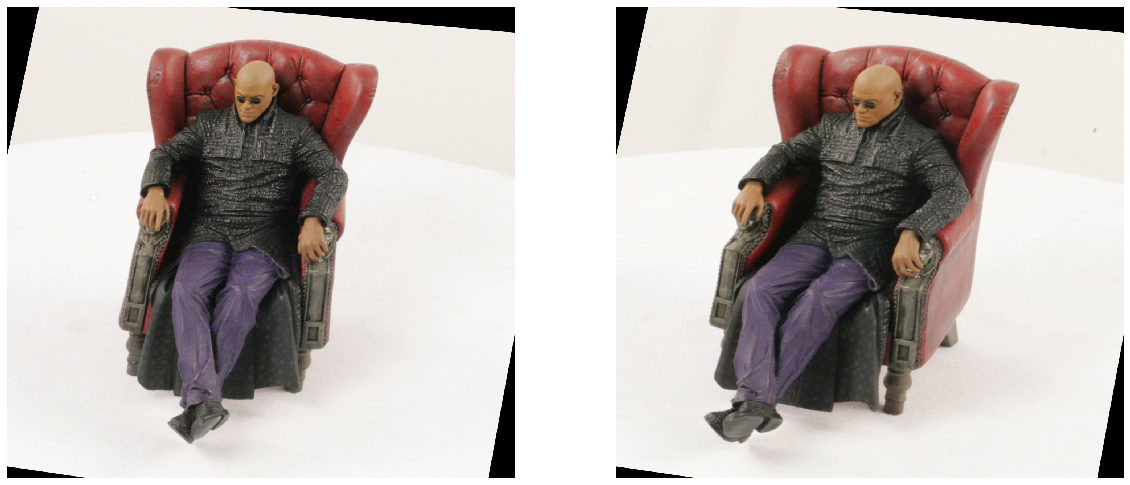

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.subplot(121),plt.imshow(cv.cvtColor(img1_warp, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(img2_warp, cv.COLOR_BGR2RGB))

plt.subplot(121).get_xaxis().set_visible(False)
plt.subplot(121).get_yaxis().set_visible(False)
plt.subplot(122).get_xaxis().set_visible(False)
plt.subplot(122).get_yaxis().set_visible(False)

plt.subplot(121).axis('off')
plt.subplot(122).axis('off')


plt.show()

In [28]:
cv.imwrite('morpheus_L_rectified.png', img1_warp)

True

In [29]:
cv.imwrite('morpheus_R_rectified.png', img2_warp)

True

### Rematches points after rectification

In [30]:
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1_warp,None)
kp2, des2 = sift.detectAndCompute(img2_warp,None)


# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
        
len(pts1),len(pts2)

(279, 279)

In [31]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

In [32]:
F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)

In [33]:
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]
len(pts1),len(pts2)

(213, 213)

In [34]:
img_draw_matches = cv.hconcat([img1_warp, img2_warp])
for i in range(len(pts1)):
    pt1 = np.array([pts1[i][0], pts1[i][1], 1])
    pt1 = pt1.reshape(3, 1)
    pt2 = np.dot(H, pt1)
    pt2 = pt2/pt2[2]
    end = (int(img1.shape[1] + pt2[0]), int(pt2[1]))
    color = tuple(np.random.randint(0,255,3).tolist())
    cv.line(img_draw_matches, tuple([int(j) for j in pts1[i]]), end, color, 2)


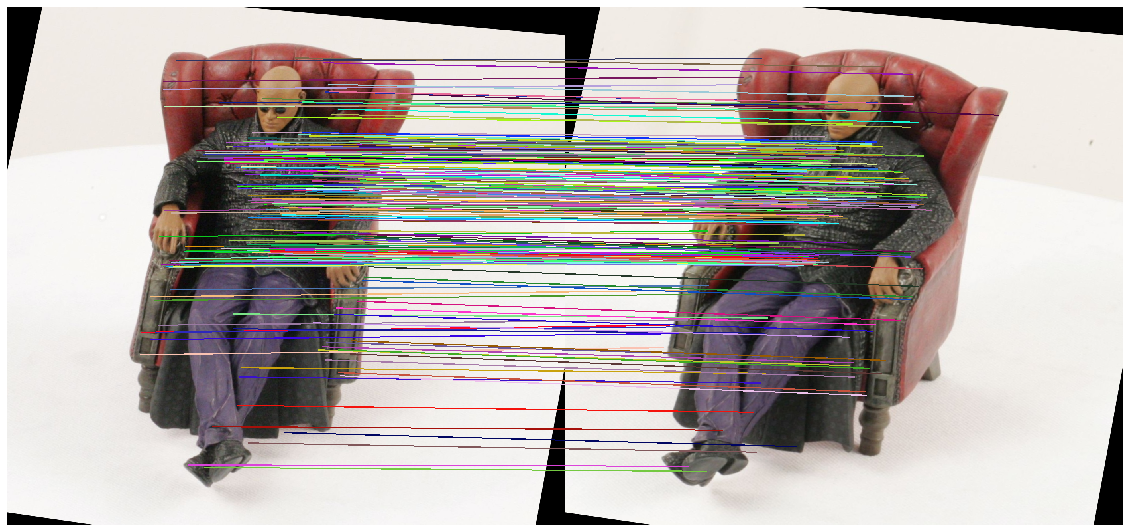

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))
fig.axes[0].get_xaxis().set_visible(False)
fig.axes[0].get_yaxis().set_visible(False)
plt.axis('off')
plt.imshow(cv.cvtColor(img_draw_matches, cv.COLOR_BGR2RGB))
plt.show()

In [36]:
# img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
# img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
# img1_warp = cv.cvtColor(img1_warp, cv.COLOR_BGR2GRAY)
# img2_warp = cv.cvtColor(img2_warp, cv.COLOR_BGR2GRAY)

In [37]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''

#     img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
#     img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    #print(img1.shape[0:2])
    r,c = img1.shape[0:2]

    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

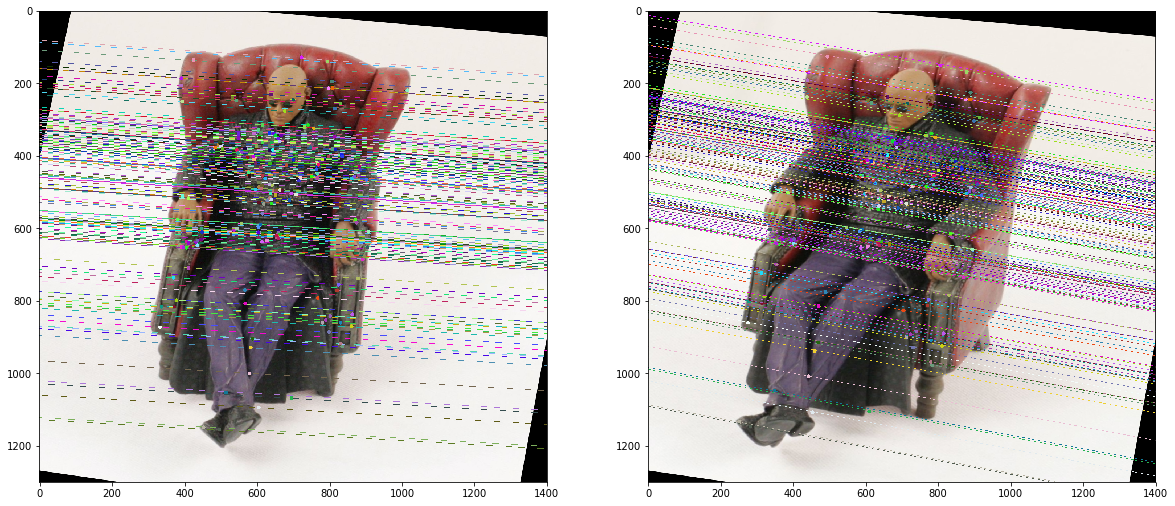

In [38]:
fig, ax = plt.subplots(figsize=(20, 10))
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1_warp,img2_warp,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2_warp,img1_warp,lines2,pts2,pts1)
plt.subplot(121),plt.imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.show()